In [0]:
!pip install -U -q PyDrive

## Leitura dos Arquivos no Drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [20]:
!ls "/content/drive/My Drive/PSI5886"

Analise_simpson.ipynb  innvestigate	  modelo_resnet50simpson.h5
imagens_teste.npy      labels_teste.npy   Simpson_train_resnet50.ipynb
imagens_treino.npy     labels_treino.npy


In [0]:
import numpy as np

In [0]:
X_test=np.load("/content/drive/My Drive/PSI5886/imagens_teste.npy")
y_test=np.load("/content/drive/My Drive/PSI5886/labels_teste.npy")

In [0]:
imagens_treino=np.load("/content/drive/My Drive/PSI5886/imagens_treino.npy")
labels_treino=np.load("/content/drive/My Drive/PSI5886/labels_treino.npy")

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(imagens_treino, labels_treino, test_size=0.15, random_state=42)


In [0]:
new_y_test=[]
for i in range(len(y_test)):
  for j in range(len(y_test[i])):
    if y_test[i][j]==1:
      new_y_test.append(j)
new_y_test=np.asarray(new_y_test)

In [0]:
new_y_train=[]
for i in range(len(y_train)):
  for j in range(len(y_train[i])):
    if y_train[i][j]==1:
      new_y_train.append(j)
new_y_train=np.asarray(new_y_train)

In [0]:
new_y_val=[]
for i in range(len(y_val)):
  for j in range(len(y_val[i])):
    if y_val[i][j]==1:
      new_y_val.append(j)
new_y_val=np.asarray(new_y_val)

## Montagem da rede Simpson


In [0]:
from keras.applications.resnet50 import ResNet50

conv_base = model = ResNet50(weights='imagenet',
                            include_top=False,
                            input_shape=(64, 64, 3))


# conv_base = VGG19(weights='imagenet',

#                   include_top=False,

#                   input_shape=(64, 64, 3))

 

conv_base.summary()

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 3s 0us/step
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 70, 70, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 32, 32, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 32, 32, 64)   256         conv1[0][0]                      
____________________________________________

In [0]:
from keras import models, layers, optimizers

model = models.Sequential()

model.add(conv_base)


model.add(layers.Flatten())

model.add(layers.Dense(1024, activation='relu'))

model.add(layers.Dropout(0.5))

model.add(layers.Dense(18, activation='softmax'))

 



In [0]:
model.compile(optimizer=optimizers.RMSprop(lr=1e-5),

              loss='sparse_categorical_crossentropy',

              metrics=['acc'])

 

history = model.fit(X_train,new_y_train,

                    epochs=20,

                   # steps_per_epoch=100,

                    batch_size=100,

                    validation_data=(X_val, new_y_val))

Train on 16143 samples, validate on 2849 samples
Epoch 1/20
16143/16143 [==============================] - 78s 5ms/step - loss: 1.3563 - acc: 0.5947 - val_loss: 1.4316 - val_acc: 0.5672
Epoch 2/20
16143/16143 [==============================] - 67s 4ms/step - loss: 1.0458 - acc: 0.6875 - val_loss: 1.2998 - val_acc: 0.6181
Epoch 3/20
16143/16143 [==============================] - 67s 4ms/step - loss: 0.8190 - acc: 0.7532 - val_loss: 1.1907 - val_acc: 0.6501
Epoch 4/20
16143/16143 [==============================] - 67s 4ms/step - loss: 0.6245 - acc: 0.8103 - val_loss: 1.1169 - val_acc: 0.6757
Epoch 5/20
16143/16143 [==============================] - 67s 4ms/step - loss: 0.4912 - acc: 0.8498 - val_loss: 1.0590 - val_acc: 0.6992
Epoch 6/20
16143/16143 [==============================] - 67s 4ms/step - loss: 0.3715 - acc: 0.8895 - val_loss: 1.0207 - val_acc: 0.7178
Epoch 7/20
16143/16143 [==============================] - 67s 4ms/step - loss: 0.2829 - acc: 0.9169 - val_loss: 0.9992 - val_acc:

In [0]:
import matplotlib.pyplot as plt
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

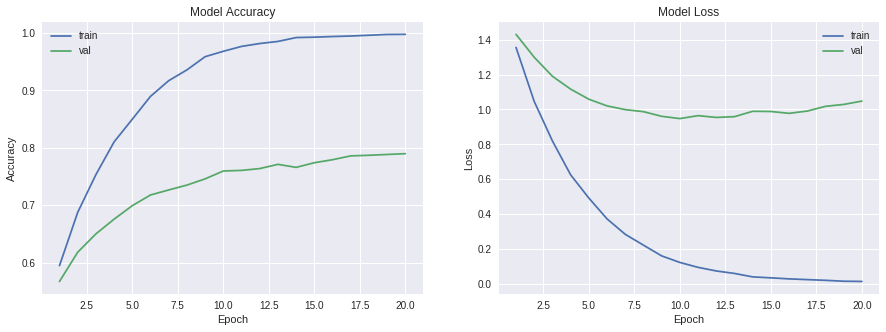

In [0]:
plot_model_history(history)

In [23]:
model.evaluate(X_test,new_y_test)

890/890 [==============================] - 1s 2ms/step


[0.27486738004758327, 0.9359550561797753]

## Previsão e Avaliação do modelo

In [0]:
y_pred = model.predict(X_test)

In [25]:
import sklearn
map_characters = {0: 'abraham_grampa_simpson', 1: 'apu_nahasapeemapetilon', 2: 'bart_simpson', 
        3: 'charles_montgomery_burns', 4: 'chief_wiggum', 5: 'comic_book_guy', 6: 'edna_krabappel', 
        7: 'homer_simpson', 8: 'kent_brockman', 9: 'krusty_the_clown', 10: 'lisa_simpson', 
        11: 'marge_simpson', 12: 'milhouse_van_houten', 13: 'moe_szyslak', 
        14: 'ned_flanders', 15: 'nelson_muntz', 16: 'principal_skinner', 17: 'sideshow_bob'}

print('\n', sklearn.metrics.classification_report(np.where(y_test > 0)[1], 
                                                  np.argmax(y_pred, axis=1), 
                                                  target_names=list(map_characters.values())), sep='')


                          precision    recall  f1-score   support

  abraham_grampa_simpson       0.93      0.85      0.89        48
  apu_nahasapeemapetilon       0.98      1.00      0.99        50
            bart_simpson       0.96      0.96      0.96        50
charles_montgomery_burns       0.90      0.96      0.93        48
            chief_wiggum       0.96      0.96      0.96        50
          comic_book_guy       0.92      0.96      0.94        49
          edna_krabappel       1.00      0.94      0.97        50
           homer_simpson       0.88      0.88      0.88        50
           kent_brockman       0.94      0.90      0.92        50
        krusty_the_clown       0.96      0.98      0.97        50
            lisa_simpson       0.96      0.92      0.94        50
           marge_simpson       0.94      0.96      0.95        50
     milhouse_van_houten       0.92      1.00      0.96        49
             moe_szyslak       0.90      0.94      0.92        50
        

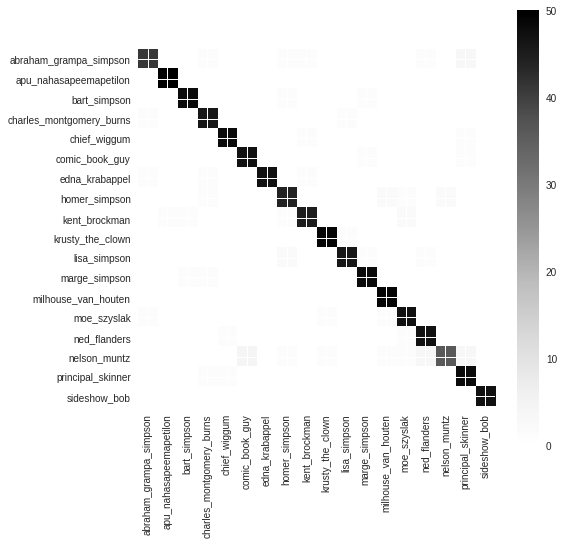

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
cnf_matrix = sklearn.metrics.confusion_matrix(np.where(y_test > 0)[1], np.argmax(y_pred, axis=1))
classes = list(map_characters.values())
plt.imshow(cnf_matrix)
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

In [27]:
print(cnf_matrix)

[[41  0  0  1  0  0  0  1  1  0  0  0  0  0  1  0  3  0]
 [ 0 50  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 48  0  0  0  0  1  0  0  0  1  0  0  0  0  0  0]
 [ 1  0  0 46  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0 48  0  0  0  1  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0 47  0  0  0  0  0  1  0  0  0  0  1  0]
 [ 1  0  0  1  0  0 47  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0 44  0  0  0  0  2  1  0  2  0  0]
 [ 0  1  1  0  0  0  0  1 45  0  0  0  0  2  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 49  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  0  0 46  1  0  0  1  0  0  0]
 [ 0  0  1  1  0  0  0  0  0  0  0 48  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 49  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  1  0  0  1 47  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0  1 47  0  0  0]
 [ 0  0  0  0  0  4  0  1  0  1  0  0  1  1  3 36  3  0]
 [ 0  0  0  1  1  0  0  0  0  0  0  0  0  0  0  0 48  0]
 [ 0  0  0  0  0  0  0  0  0  0

In [0]:

model.save_weights('/content/drive/My Drive/PSI5886/modelo_resnet50simpson.h5')
